# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [4]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [6]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

In [7]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [8]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

In [ ]:
LabelEncoder: Convierte las categorias en numeros enteros unicos tipo rojo=1, verder=2 y oneHotEncoder crea nuevas columnas binarias 0 o 1, una por cada categoria

### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

--- Frecuencia original de 'sex' ---
sex
male      577
female    314
Name: count, dtype: int64


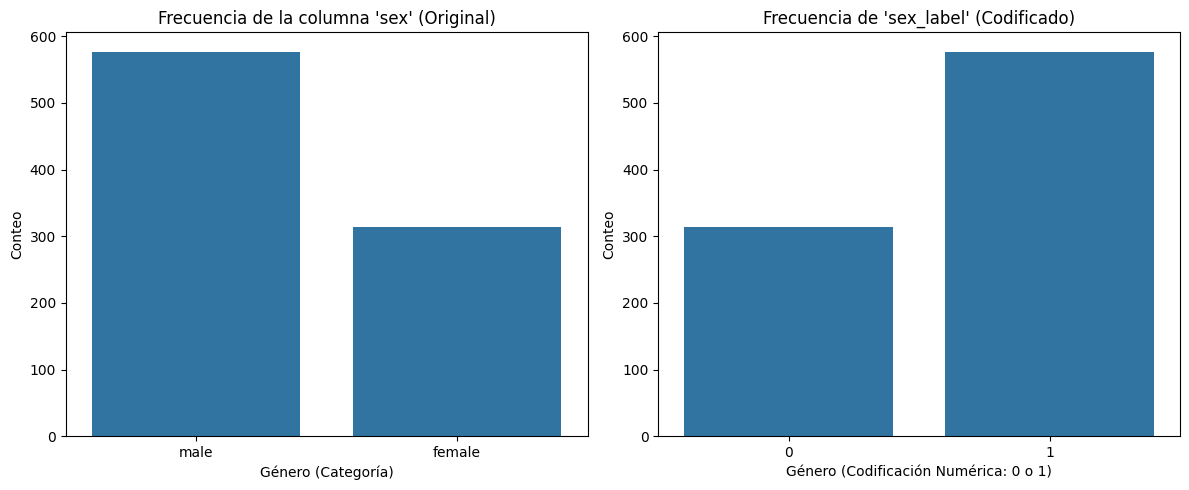

In [7]:
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

data = sns.load_dataset('titanic').copy()
print(data.head())
print("\n--- Frecuencia original de 'sex' ---")
print(data['sex'].value_counts())

# Codificar 'sex' con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

# Codificar 'embarked' con OneHotEncoder (usando pd.get_dummies)
onehot_encoder_embarked = pd.get_dummies(data['embarked'], prefix='embarked', dummy_na=True)
data = pd.concat([data, onehot_encoder_embarked], axis=1)
# 2. Gráfica de barras comparando 'sex' (original) y 'sex_label' (codificada)
plt.figure(figsize=(12, 5))

# Gráfica 1: Frecuencia de 'sex' original
plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=data)
plt.title("Frecuencia de la columna 'sex' (Original)")
plt.xlabel("Género (Categoría)")
plt.ylabel("Conteo")

# Gráfica 2: Frecuencia de 'sex_label' codificada
plt.subplot(1, 2, 2)
sns.countplot(x='sex_label', data=data)
plt.title("Frecuencia de 'sex_label' (Codificado)")
plt.xlabel("Género (Codificación Numérica: 0 o 1)")
plt.ylabel("Conteo")

plt.tight_layout()
plt.show()

### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [8]:
onehot_encoder_class = pd.get_dummies(data['class'], prefix='class')
data_encoded = pd.concat([data, onehot_encoder_class], axis=1)

print("\n--- Vista de la codificación 'class' con OneHotEncoder (Últimas columnas) ---")
print(data_encoded[['class', 'class_First', 'class_Second', 'class_Third']].head())


--- Vista de la codificación 'class' con OneHotEncoder (Últimas columnas) ---
   class  class_First  class_Second  class_Third
0  Third        False         False         True
1  First         True         False        False
2  Third        False         False         True
3  First         True         False        False
4  Third        False         False         True


### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

In [10]:
La elección de la codificación depende de si la variable es Nominal u Ordinal
si nominal One-Hot Encoding por que evita crear relaciones de orden o magnitud artificiales entre categorías que no existen en la realidad
si ordinal Label Encoding preserva el orden de las categorias

SyntaxError: invalid syntax (723659821.py, line 1)